<br>
here importing lib 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline 
import seaborn as sns

In [89]:
# Here have the diffrents imoports for the clf
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
# from sklearn.metrics import precision_score

In [1]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score

In [91]:
onlinefood_datasets = pd.read_csv('onlinefoods.csv')
onlinefood_datasets.sample(5)

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
113,23,Female,Single,Student,No Income,Graduate,5,13.0206,77.6479,560043,Yes,Positive,Yes
331,25,Female,Single,Student,No Income,Ph.D,3,12.9048,77.6821,560036,Yes,Positive,Yes
232,24,Female,Single,Self Employeed,25001 to 50000,Post Graduate,3,13.0103,77.5796,560080,No,Negative,No
268,22,Male,Single,Student,25001 to 50000,Graduate,3,12.9783,77.6408,560038,Yes,Positive,Yes
378,23,Female,Single,Employee,25001 to 50000,Post Graduate,2,12.9847,77.5491,560100,Yes,Positive,Yes


In [92]:
from pandas_profiling import ProfileReport
prof = ProfileReport(onlinefood_datasets)
prof.to_file(output_file = 'output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\ASUS\anaconda3\Lib\site-packages\ydata_profiling\model\correlations.py:66: UserWarning: There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"auto": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'could not convert string to float: 'Post Graduate'')
  warnings.warn(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [93]:
onlinefood_datasets.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


In [94]:
onlinefood_datasets.shape

(388, 13)

In [95]:
onlinefood_datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
 12  Unnamed: 12                 388 non-null    object 
dtypes: float64(2), int64(3), object(8)


In [96]:
onlinefood_datasets.isnull().mean()*100

Age                           0.0
Gender                        0.0
Marital Status                0.0
Occupation                    0.0
Monthly Income                0.0
Educational Qualifications    0.0
Family size                   0.0
latitude                      0.0
longitude                     0.0
Pin code                      0.0
Output                        0.0
Feedback                      0.0
Unnamed: 12                   0.0
dtype: float64

In [97]:
onlinefood_datasets.duplicated().sum()

103

In [98]:
onlinefood_datasets = onlinefood_datasets.drop_duplicates()

In [99]:
onlinefood_datasets.duplicated().sum()

0

In [100]:
onlinefood_datasets.describe()

,Age,Family size,latitude,longitude,Pin code
count,285.000000,285.000000,285.000000,285.000000,285.000000
mean,24.677193,3.270175,12.973429,77.597593,560037.280702
std,3.040977,1.361178,0.043964,0.053557,30.738306
min,18.000000,1.000000,12.865200,77.484200,560001.000000
25%,23.000000,2.000000,12.943800,77.563500,560010.000000
50%,24.000000,3.000000,12.977000,77.587700,560028.000000
75%,26.000000,4.000000,12.998000,77.622700,560066.000000
max,33.000000,6.000000,13.102000,77.758200,560109.000000


In [101]:
onlinefood_datasets.describe().corr()

,Age,Family size,latitude,longitude,Pin code
Age,1.000000,0.996743,0.998452,0.966431,-0.590129
Family size,0.996743,1.000000,0.999095,0.945516,-0.649461
latitude,0.998452,0.999095,1.000000,0.957917,-0.618442
longitude,0.966431,0.945516,0.957917,1.000000,-0.366848
Pin code,-0.590129,-0.649461,-0.618442,-0.366848,1.000000


In [102]:
onlinefood_datasets.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


In [103]:
onlinefood_datasets['Gender'].value_counts()

Gender
Male      164
Female    121
Name: count, dtype: int64

In [104]:
onlinefood_datasets['Marital Status'].value_counts()

Marital Status
Single               189
Married               87
Prefer not to say      9
Name: count, dtype: int64

In [105]:
onlinefood_datasets['Occupation'].value_counts()

Occupation
Student           144
Employee           94
Self Employeed     38
House wife          9
Name: count, dtype: int64

In [106]:
onlinefood_datasets['Monthly Income'].value_counts()

Monthly Income
No Income          131
25001 to 50000      52
More than 50000     47
10001 to 25000      36
Below Rs.10000      19
Name: count, dtype: int64

In [107]:
onlinefood_datasets['Educational Qualifications'].value_counts()

Educational Qualifications
Graduate         126
Post Graduate    125
Ph.D              21
School            11
Uneducated         2
Name: count, dtype: int64

In [108]:
onlinefood_datasets['Feedback'].value_counts()

Feedback
Positive     231
Negative      54
Name: count, dtype: int64

In [109]:
onlinefood_datasets = onlinefood_datasets.drop(columns = ['Unnamed: 12'])
onlinefood_datasets.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive


In [110]:
onlinefood_datasets = onlinefood_datasets.drop('Monthly Income',axis =1)
onlinefood_datasets.head()

,Age,Gender,Marital Status,Occupation,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback
0,20,Female,Single,Student,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive
1,24,Female,Single,Student,Graduate,3,12.9770,77.5773,560009,Yes,Positive
2,22,Male,Single,Student,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative
3,22,Female,Single,Student,Graduate,6,12.9473,77.5616,560019,Yes,Positive
4,22,Male,Single,Student,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive


In [111]:
new_names = {'Output':'order_ delivered'}
onlinefood_datasets = onlinefood_datasets.rename(columns=new_names)

In [112]:
onlinefood_datasets.head()

,Age,Gender,Marital Status,Occupation,Educational Qualifications,Family size,latitude,longitude,Pin code,order_ delivered,Feedback
0,20,Female,Single,Student,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive
1,24,Female,Single,Student,Graduate,3,12.9770,77.5773,560009,Yes,Positive
2,22,Male,Single,Student,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative
3,22,Female,Single,Student,Graduate,6,12.9473,77.5616,560019,Yes,Positive
4,22,Male,Single,Student,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive


In [184]:
abel_encoder = LabelEncoder()

# Encode the 'Category' column
onlinefood_datasets['order_ delivered'] = abel_encoder.fit_transform(onlinefood_datasets['order_ delivered'])

In [186]:
onlinefood_datasets.head()

,Age,Gender,Marital Status,Occupation,Educational Qualifications,Family size,latitude,longitude,Pin code,order_ delivered,Feedback
0,20,Female,Single,Student,Post Graduate,4,12.9766,77.5993,560001,1,Positive
1,24,Female,Single,Student,Graduate,3,12.9770,77.5773,560009,1,Positive
2,22,Male,Single,Student,Post Graduate,3,12.9551,77.6593,560017,1,Negative
3,22,Female,Single,Student,Graduate,6,12.9473,77.5616,560019,1,Positive
4,22,Male,Single,Student,Post Graduate,4,12.9850,77.5533,560010,1,Positive


In [187]:
onlinefood_datasets['order_ delivered'].value_counts()	

order_ delivered
1    217
0     68
Name: count, dtype: int64

<br>
here now we applying the eda 

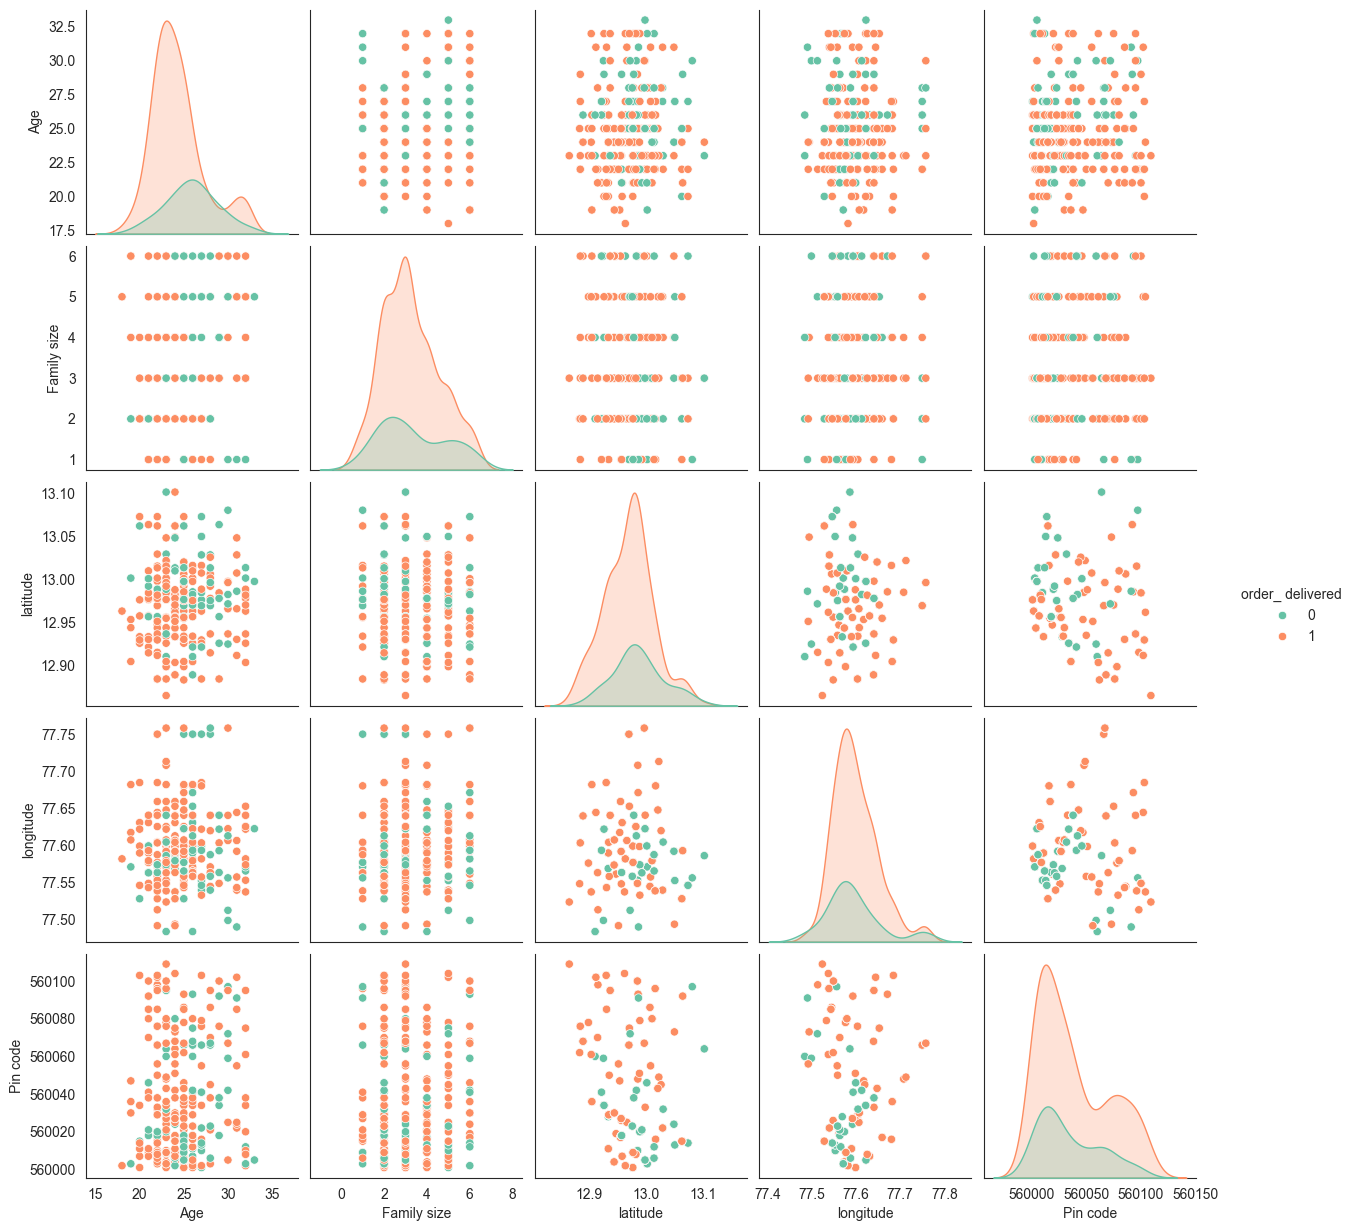

In [188]:
# fist we applying the pair polt
sns.pairplot(onlinefood_datasets,hue = 'order_ delivered',palette='Set2')
plt.show()

In [189]:
onlinefood_datasets.head()

,Age,Gender,Marital Status,Occupation,Educational Qualifications,Family size,latitude,longitude,Pin code,order_ delivered,Feedback
0,20,Female,Single,Student,Post Graduate,4,12.9766,77.5993,560001,1,Positive
1,24,Female,Single,Student,Graduate,3,12.9770,77.5773,560009,1,Positive
2,22,Male,Single,Student,Post Graduate,3,12.9551,77.6593,560017,1,Negative
3,22,Female,Single,Student,Graduate,6,12.9473,77.5616,560019,1,Positive
4,22,Male,Single,Student,Post Graduate,4,12.9850,77.5533,560010,1,Positive


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19700\2123139478.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender',data = onlinefood_datasets,palette='Set2')


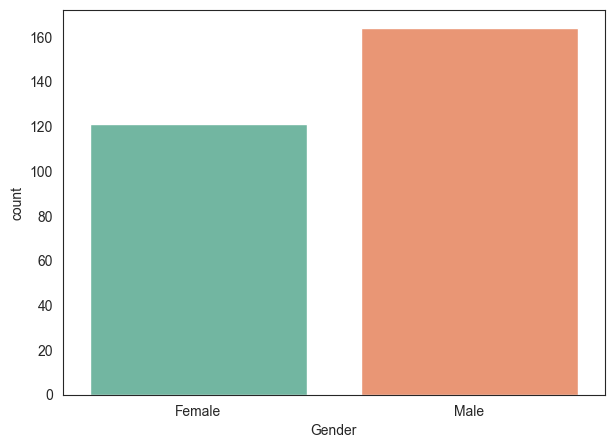

In [190]:
plt.figure(figsize = (7,5))
sns.countplot(x='Gender',data = onlinefood_datasets,palette='Set2')
plt.show()

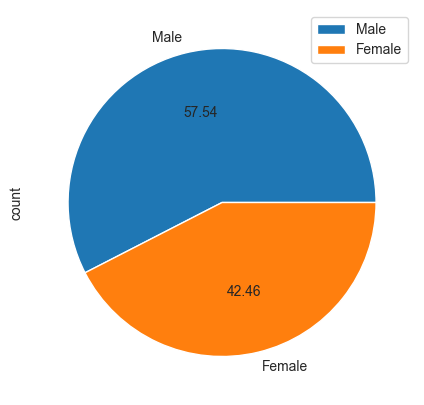

In [191]:
plt.figure(figsize =(7,5))
# plt.figure(figsize =(14,9))
onlinefood_datasets['Gender'].value_counts().plot(kind="pie",autopct = '%.2f')
plt.legend()
plt.show()

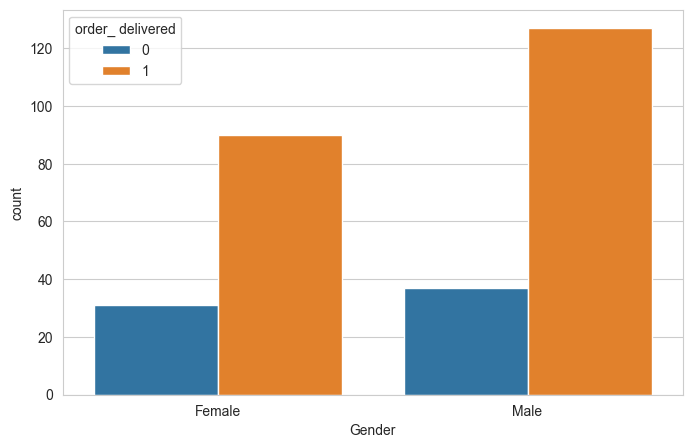

In [192]:
plt.figure(figsize = (8,5))
sns.set_style("whitegrid")
sns.countplot(x='Gender',data = onlinefood_datasets,hue = 'order_ delivered')
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19700\3167639093.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Marital Status',data = onlinefood_datasets,palette='dark')


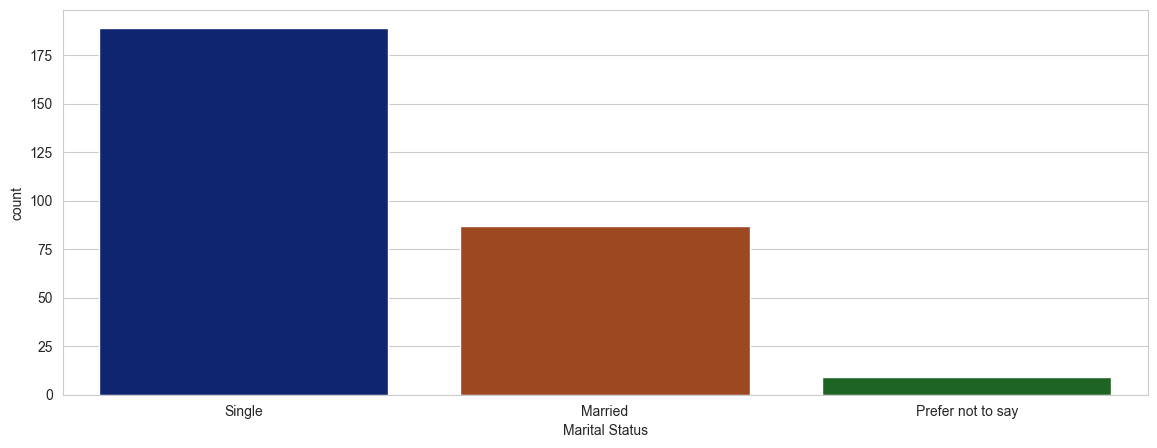

In [193]:
plt.figure(figsize = (14,5))
sns.set_style("whitegrid")
sns.countplot(x = 'Marital Status',data = onlinefood_datasets,palette='dark')
plt.show()

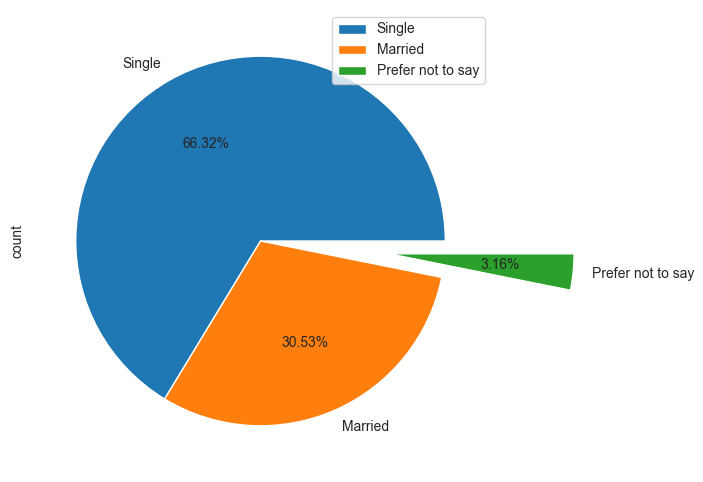

In [194]:
plt.figure(figsize =(10,6))
ex = [0.0,0.0,0.7]
onlinefood_datasets['Marital Status'].value_counts().plot(kind = 'pie',autopct = '%.2f%%',explode = ex)
plt.legend()
plt.show()

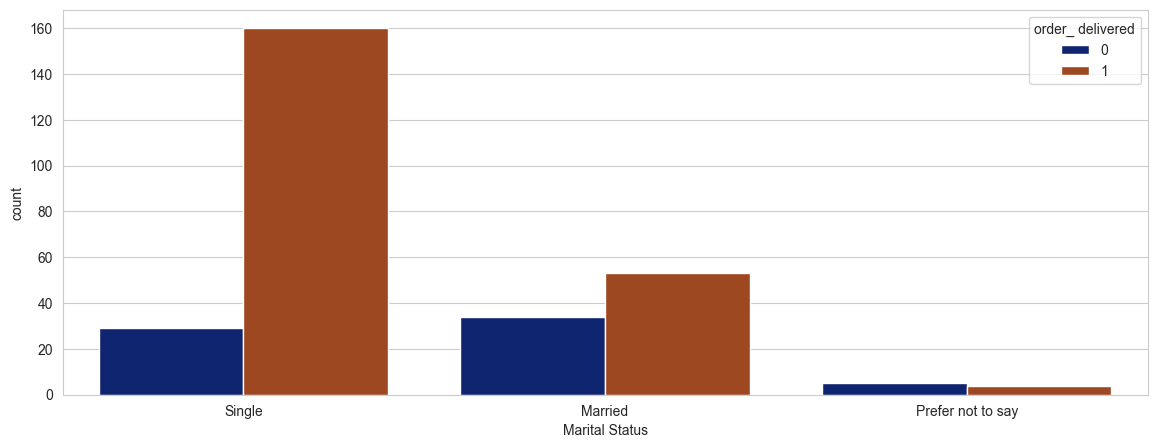

In [195]:
plt.figure(figsize = (14,5))
sns.set_style("whitegrid")
sns.countplot(x = 'Marital Status',data = onlinefood_datasets,palette='dark',hue = 'order_ delivered')
# plt.legend()
plt.show()

In [196]:
onlinefood_datasets.head()

,Age,Gender,Marital Status,Occupation,Educational Qualifications,Family size,latitude,longitude,Pin code,order_ delivered,Feedback
0,20,Female,Single,Student,Post Graduate,4,12.9766,77.5993,560001,1,Positive
1,24,Female,Single,Student,Graduate,3,12.9770,77.5773,560009,1,Positive
2,22,Male,Single,Student,Post Graduate,3,12.9551,77.6593,560017,1,Negative
3,22,Female,Single,Student,Graduate,6,12.9473,77.5616,560019,1,Positive
4,22,Male,Single,Student,Post Graduate,4,12.9850,77.5533,560010,1,Positive


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19700\1653380456.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x ='Occupation',data = onlinefood_datasets,palette='bright')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


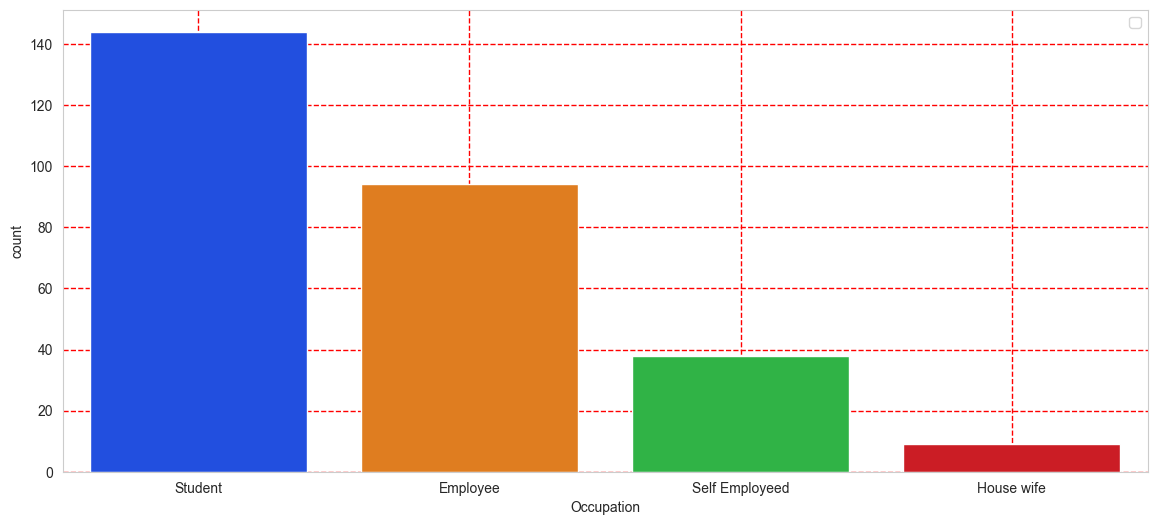

In [197]:
plt.figure(figsize =(14,6))
# sns.set_style("whitegrid")
sns.countplot(x ='Occupation',data = onlinefood_datasets,palette='bright')
plt.grid(True, linestyle='--', linewidth=1, color='red') 
plt.legend()
plt.show()

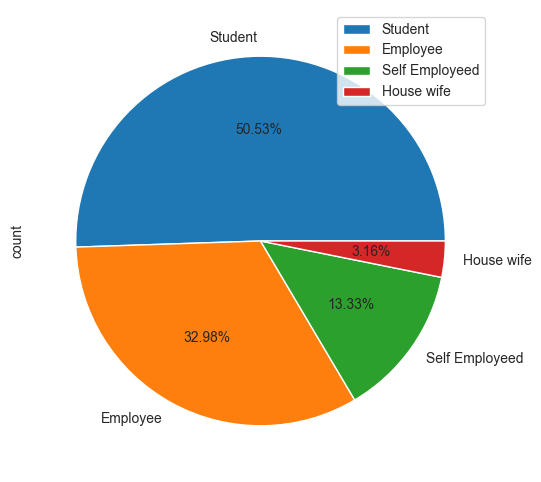

In [198]:
plt.figure(figsize =(9,6))
# ex = [0.0,0.0,0.7]
onlinefood_datasets['Occupation'].value_counts().plot(kind = 'pie',autopct = '%.2f%%')
plt.legend()
plt.show()

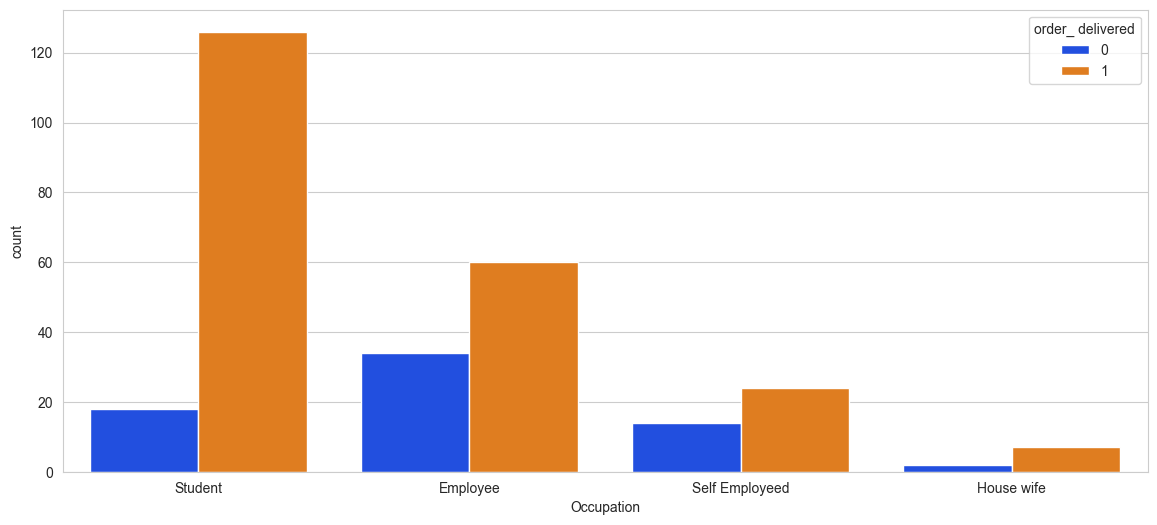

In [199]:
plt.figure(figsize =(14,6))
sns.set_style("whitegrid")
sns.countplot(x ='Occupation',data = onlinefood_datasets,palette='bright',hue = 'order_ delivered')
# plt.grid(True, linestyle='--', linewidth=1, color='red') 
# plt.legend()
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19700\1599287431.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Educational Qualifications',data = onlinefood_datasets,palette='dark')


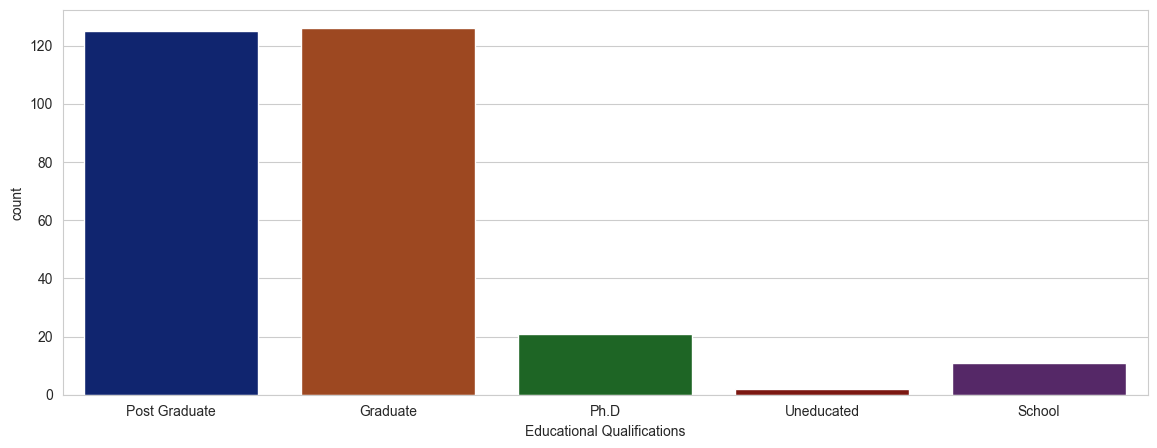

In [200]:
plt.figure(figsize =(14,5))
sns.countplot(x = 'Educational Qualifications',data = onlinefood_datasets,palette='dark')
sns.set_style("whitegrid")
plt.show()

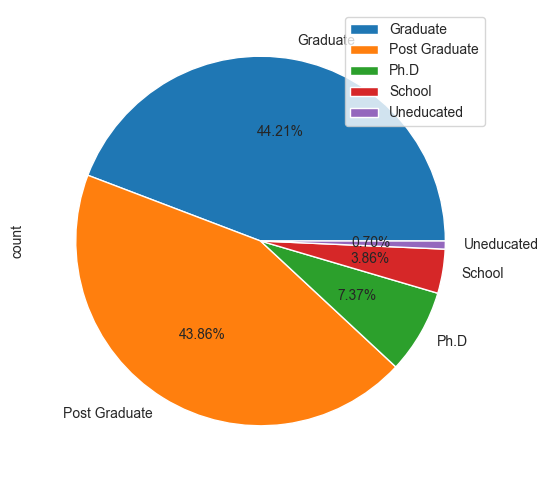

In [201]:
plt.figure(figsize =(9,6))
# ex = [0.0,0.0,0.7]
onlinefood_datasets['Educational Qualifications'].value_counts().plot(kind = 'pie',autopct = '%.2f%%')
# plt.pie(x = '', labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
# plt.legend(title='Monthly Income', loc='upper left')
plt.legend()
plt.show()

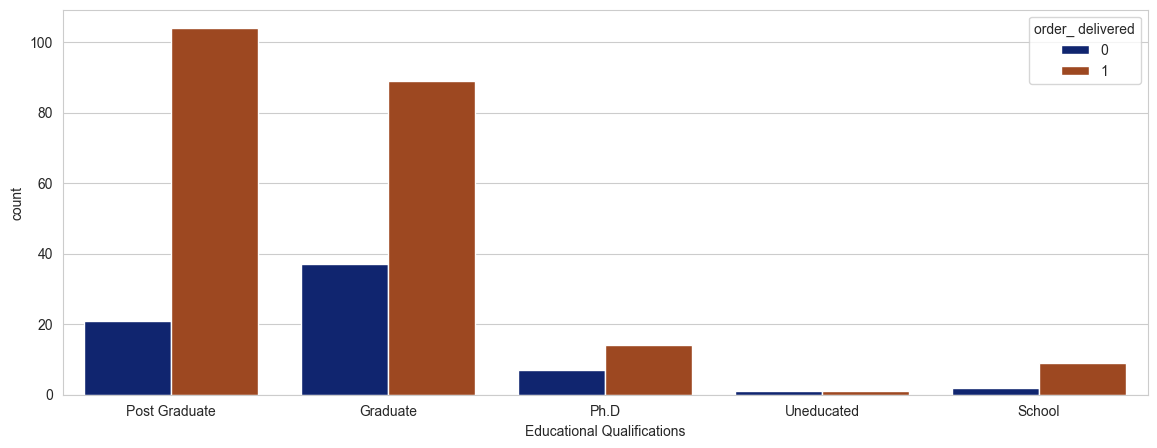

In [202]:
plt.figure(figsize =(14,5))
sns.countplot(x = 'Educational Qualifications',data = onlinefood_datasets,palette='dark',hue = 'order_ delivered')
sns.set_style("whitegrid")
plt.show()

In [203]:
onlinefood_datasets.head()

,Age,Gender,Marital Status,Occupation,Educational Qualifications,Family size,latitude,longitude,Pin code,order_ delivered,Feedback
0,20,Female,Single,Student,Post Graduate,4,12.9766,77.5993,560001,1,Positive
1,24,Female,Single,Student,Graduate,3,12.9770,77.5773,560009,1,Positive
2,22,Male,Single,Student,Post Graduate,3,12.9551,77.6593,560017,1,Negative
3,22,Female,Single,Student,Graduate,6,12.9473,77.5616,560019,1,Positive
4,22,Male,Single,Student,Post Graduate,4,12.9850,77.5533,560010,1,Positive


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19700\648543812.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'Feedback',data = onlinefood_datasets,palette='dark')


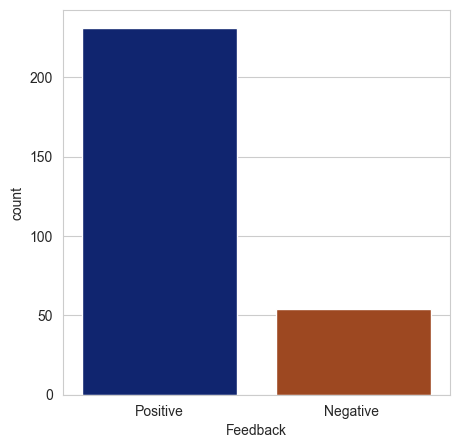

In [204]:
plt.figure(figsize =(5,5))
sns.countplot(x = 'Feedback',data = onlinefood_datasets,palette='dark')
sns.set_style("whitegrid")
plt.show()

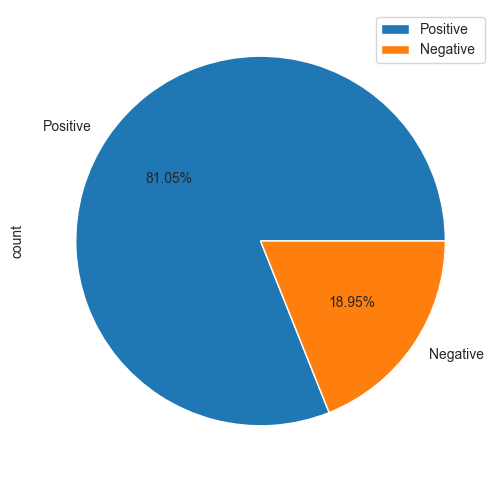

In [205]:
plt.figure(figsize =(9,6))
# ex = [0.0,0.0,0.7]
onlinefood_datasets['Feedback'].value_counts().plot(kind = 'pie',autopct = '%.2f%%')
# plt.pie(x = '', labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
# plt.legend(title='Monthly Income', loc='upper left')
plt.legend()
plt.show()

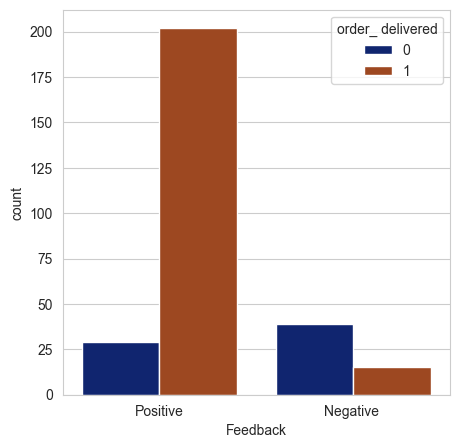

In [206]:
plt.figure(figsize =(5,5))
sns.countplot(x = 'Feedback',data = onlinefood_datasets,palette='dark',hue = 'order_ delivered')
sns.set_style("whitegrid")
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19700\872990783.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'order_ delivered',data = onlinefood_datasets,palette='dark')


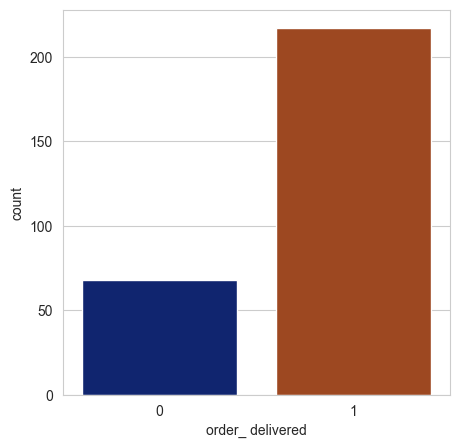

In [207]:
plt.figure(figsize =(5,5))
sns.countplot(x = 'order_ delivered',data = onlinefood_datasets,palette='dark')
sns.set_style("whitegrid")
plt.show()

<Figure size 640x480 with 0 Axes>

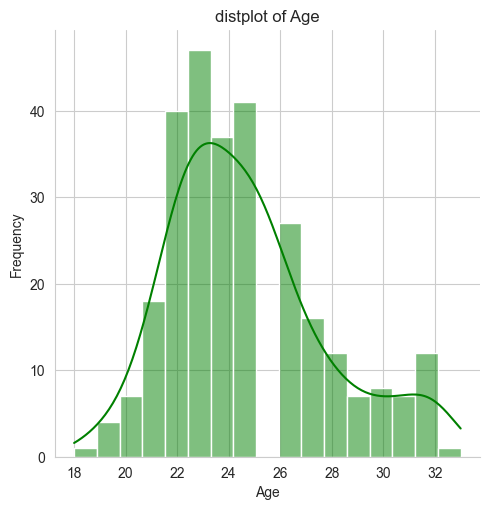

<Figure size 640x480 with 0 Axes>

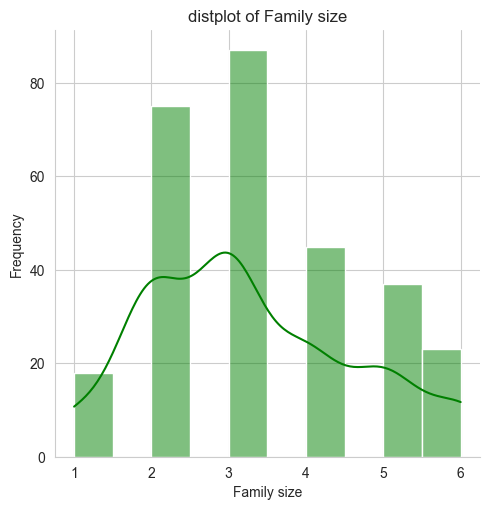

In [208]:
for column in onlinefood_datasets.columns:
     if column ==  'Age':
    
        plt.figure()# Create a new figure for each plot
        sns .displot(onlinefood_datasets[column],color = "g",kde=True)  # Plot histogram with 10 bins
        plt.xlabel(column)  # Set x-axis label as the column name
        plt.ylabel('Frequency')  # Set y-axis label
        plt.title(f'distplot of {column}')  # Set plot titl
        plt.show() 
     elif   column ==  'Family size':
         plt.figure()# Create a new figure for each plot
       
         sns .displot(onlinefood_datasets[column],color = "g",kde=True)  # Plot histogram with 10 bins
         plt.xlabel(column)  # Set x-axis label as the column name
         plt.ylabel('Frequency')  # Set y-axis label
         plt.title(f'distplot of {column}')  # Set plot titl 
         plt.show()

     else: continue

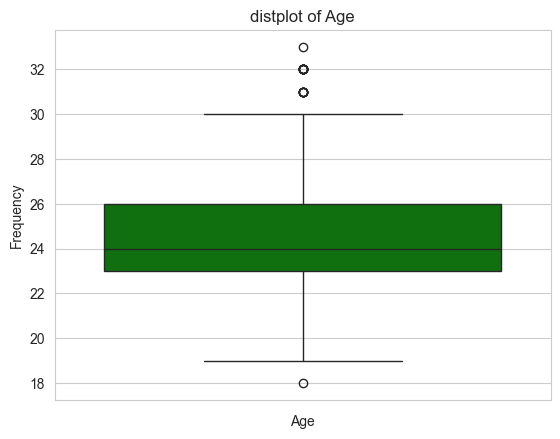

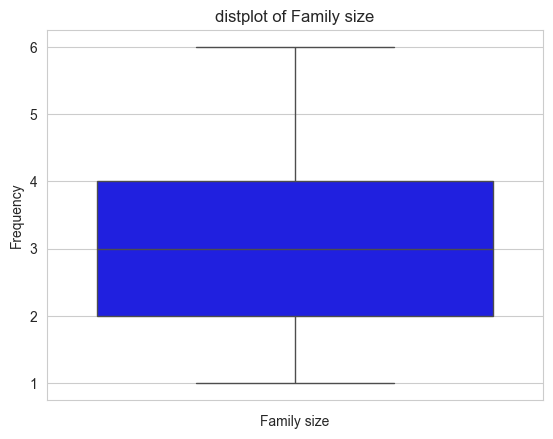

In [209]:
# now cheking the outlies in the tow columns 
for column in onlinefood_datasets.columns:
    if column == 'Age':
        plt.figure()# Create a new figure for each plot
        sns.boxplot(onlinefood_datasets[column],color = 'g')  # Plot histogram with 10 bins
        plt.xlabel(column)  # Set x-axis label as the column name
        plt.ylabel('Frequency')  # Set y-axis label
        plt.title(f'distplot of {column}')  # Set plot titl
        plt.show() 
     
    if column == 'Family size':
          plt.figure()# Create a new figure for each plot
          sns .boxplot(onlinefood_datasets[column],color = 'b')  # Plot histogram with 10 bins
          plt.xlabel(column)  # Set x-axis label as the column name
          plt.ylabel('Frequency')  # Set y-axis label
          plt.title(f'distplot of {column}')  # Set plot titl
          plt.show() 
    else :
         continue

In [210]:
onlinefood_datasets.head()

,Age,Gender,Marital Status,Occupation,Educational Qualifications,Family size,latitude,longitude,Pin code,order_ delivered,Feedback
0,20,Female,Single,Student,Post Graduate,4,12.9766,77.5993,560001,1,Positive
1,24,Female,Single,Student,Graduate,3,12.9770,77.5773,560009,1,Positive
2,22,Male,Single,Student,Post Graduate,3,12.9551,77.6593,560017,1,Negative
3,22,Female,Single,Student,Graduate,6,12.9473,77.5616,560019,1,Positive
4,22,Male,Single,Student,Post Graduate,4,12.9850,77.5533,560010,1,Positive


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


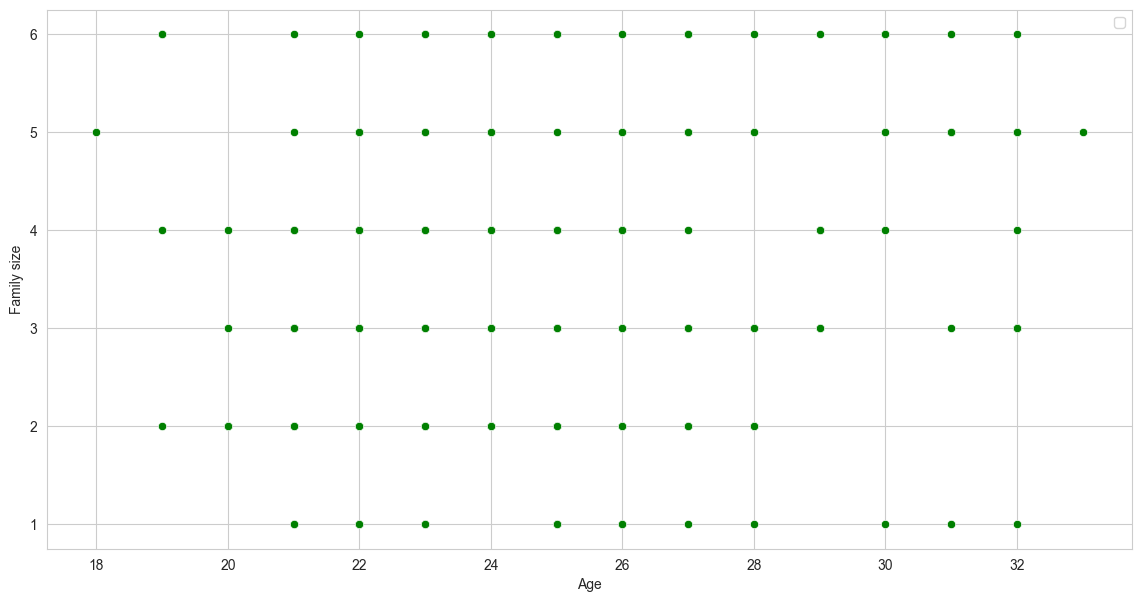

In [211]:
plt.figure(figsize = (14,7))
sns.scatterplot(x ='Age',y = 'Family size',data = onlinefood_datasets,color = 'g')
sns.set_style("white")
plt.legend()
plt.show()

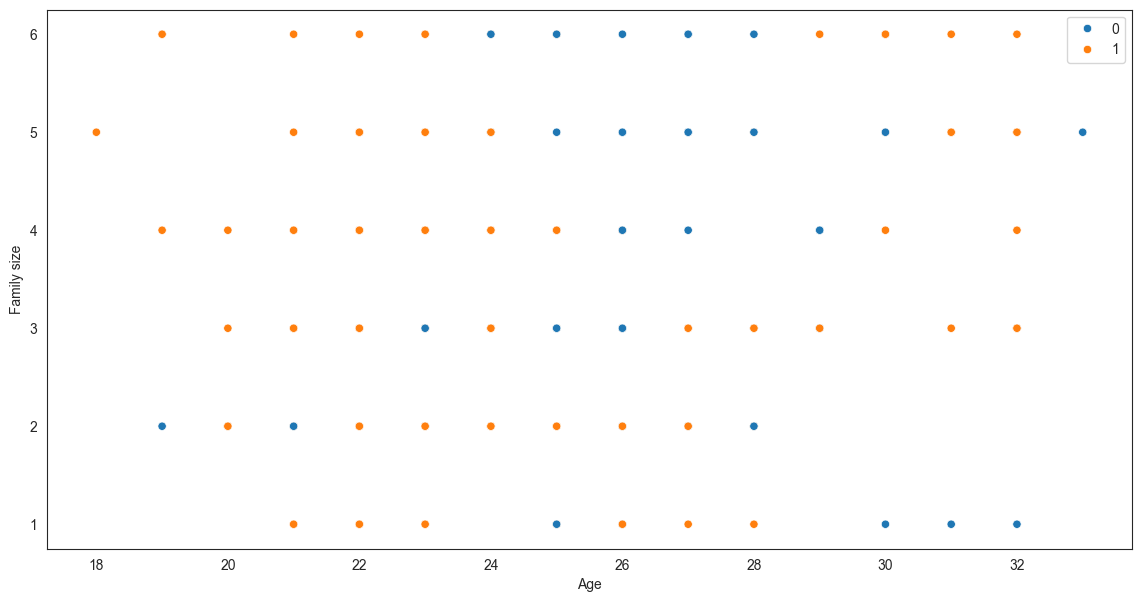

In [212]:
plt.figure(figsize = (14,7))
sns.scatterplot(x ='Age',y = 'Family size',data = onlinefood_datasets,color = 'g',hue = 'order_ delivered')
sns.set_style("white")
plt.legend()
plt.show()

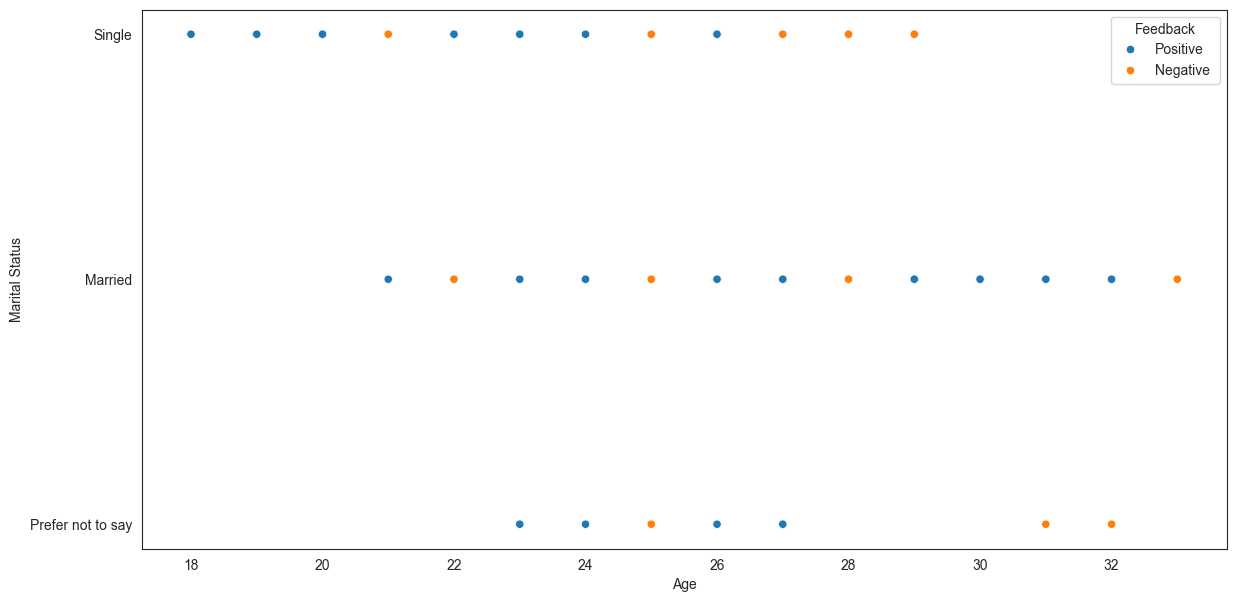

In [213]:
plt.figure(figsize = (14,7))
sns.scatterplot(x ='Age',y = 'Marital Status',data = onlinefood_datasets,color = 'g',hue = 'Feedback')
sns.set_style("white")
plt.legend(title='Feedback')
plt.show()

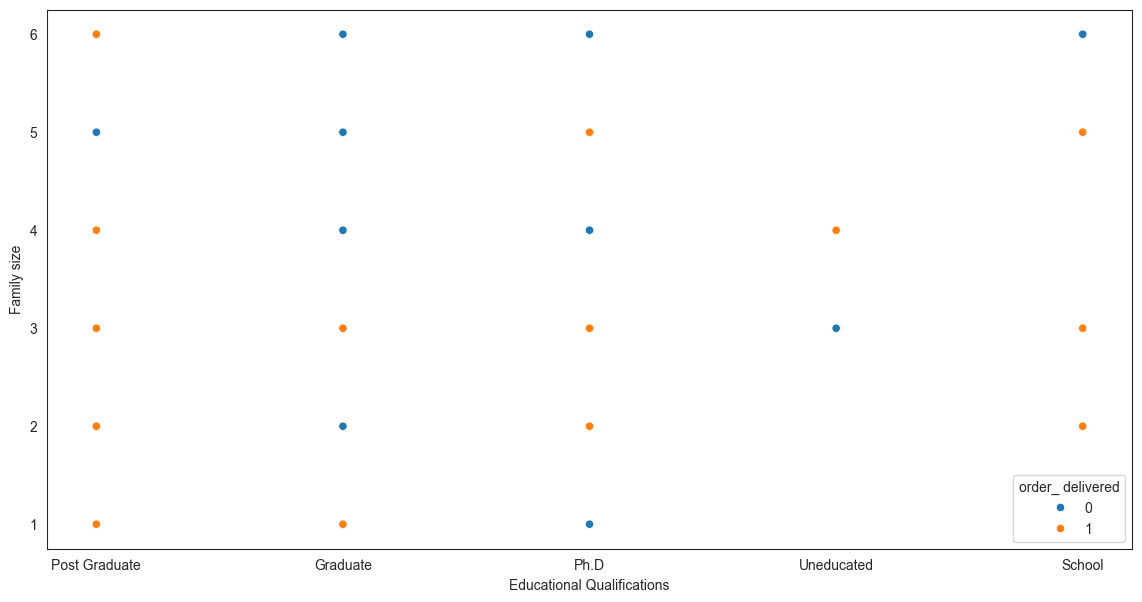

In [214]:
plt.figure(figsize = (14,7))
sns.scatterplot(x ='Educational Qualifications',y = 'Family size',data = onlinefood_datasets,color = 'r',hue = 'order_ delivered')
sns.set_style("white")
plt.legend(title='order_ delivered')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


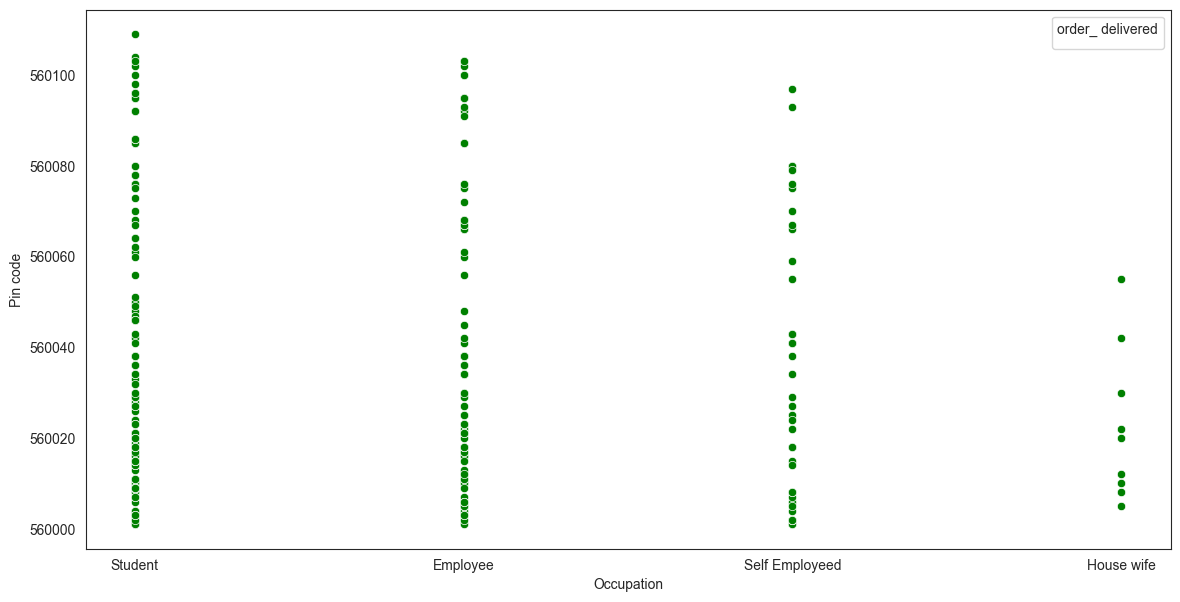

In [215]:
plt.figure(figsize = (14,7))
sns.scatterplot(x ='Occupation',y = 'Pin code',data = onlinefood_datasets,color = 'g')
# sns.set_style("white")
plt.legend(title='order_ delivered')
plt.show()

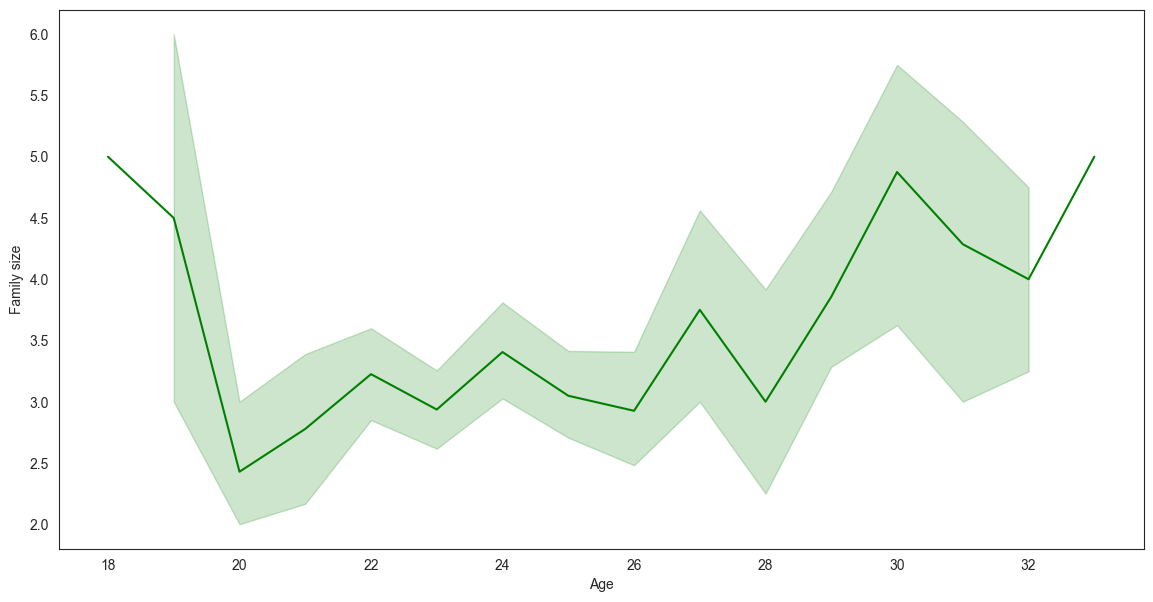

In [216]:
plt.figure(figsize = (14,7))
sns.lineplot(x ="Age",y = "Family size",data = onlinefood_datasets,color= "g")
plt.show()

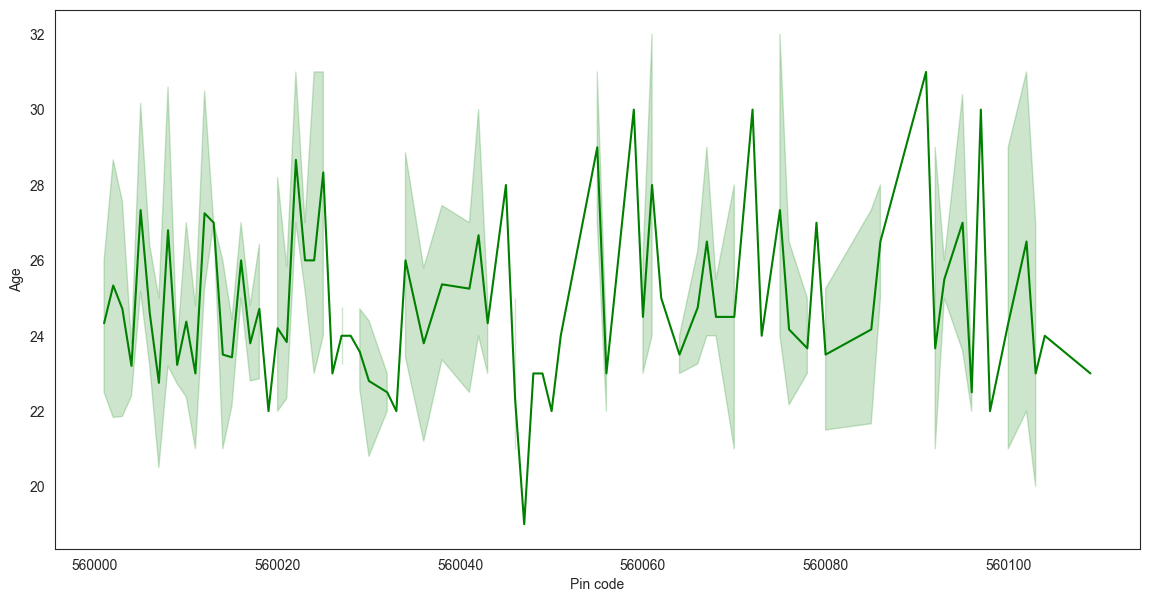

In [217]:
plt.figure(figsize = (14,7))
sns.lineplot(x ="Pin code",y = "Age",data = onlinefood_datasets,color= "g")
plt.show()

In [218]:
correlation_matrix = onlinefood_datasets.describe().corr()
correlation_matrix

,Age,Family size,latitude,longitude,Pin code,order_ delivered
Age,1.000000,0.996743,0.998452,0.966431,-0.590129,0.995911
Family size,0.996743,1.000000,0.999095,0.945516,-0.649461,0.999906
latitude,0.998452,0.999095,1.000000,0.957917,-0.618442,0.998964
longitude,0.966431,0.945516,0.957917,1.000000,-0.366848,0.943890
Pin code,-0.590129,-0.649461,-0.618442,-0.366848,1.000000,-0.653486
order_ delivered,0.995911,0.999906,0.998964,0.943890,-0.653486,1.000000


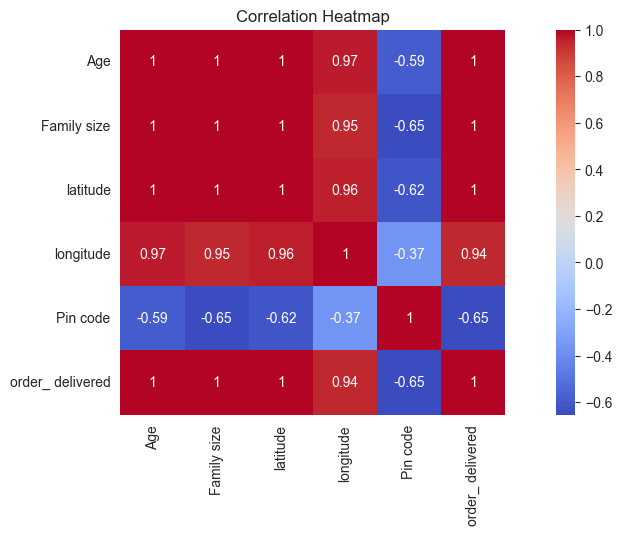

In [219]:
plt.figure(figsize=(13, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19700\2458008123.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_matrix.columns, y=correlation_matrix.iloc[0], palette='viridis')


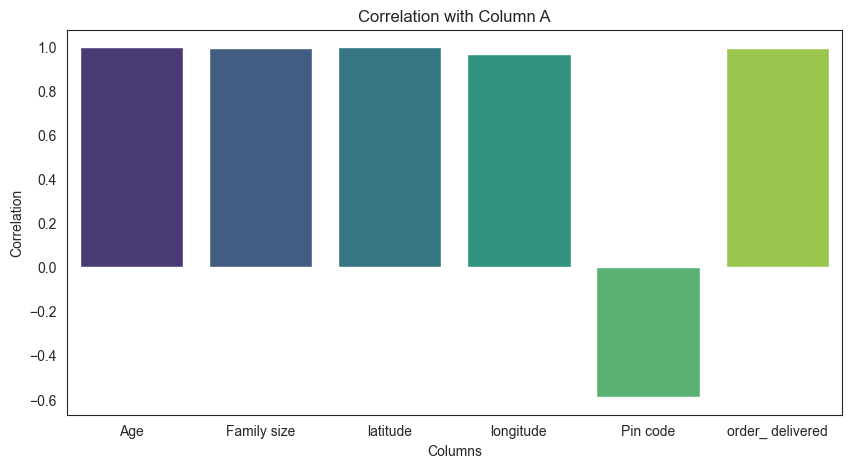

In [220]:
plt.figure(figsize=(10, 5))
sns.barplot(x=correlation_matrix.columns, y=correlation_matrix.iloc[0], palette='viridis')
plt.title('Correlation with Column A')
plt.xlabel('Columns')
plt.ylabel('Correlation')
plt.show()

In [221]:
onlinefood_datasets.head()

,Age,Gender,Marital Status,Occupation,Educational Qualifications,Family size,latitude,longitude,Pin code,order_ delivered,Feedback
0,20,Female,Single,Student,Post Graduate,4,12.9766,77.5993,560001,1,Positive
1,24,Female,Single,Student,Graduate,3,12.9770,77.5773,560009,1,Positive
2,22,Male,Single,Student,Post Graduate,3,12.9551,77.6593,560017,1,Negative
3,22,Female,Single,Student,Graduate,6,12.9473,77.5616,560019,1,Positive
4,22,Male,Single,Student,Post Graduate,4,12.9850,77.5533,560010,1,Positive


In [222]:
x = onlinefood_datasets.drop('order_ delivered',axis = 1)
y = onlinefood_datasets['order_ delivered']

In [223]:
x.head()

,Age,Gender,Marital Status,Occupation,Educational Qualifications,Family size,latitude,longitude,Pin code,Feedback
0,20,Female,Single,Student,Post Graduate,4,12.9766,77.5993,560001,Positive
1,24,Female,Single,Student,Graduate,3,12.9770,77.5773,560009,Positive
2,22,Male,Single,Student,Post Graduate,3,12.9551,77.6593,560017,Negative
3,22,Female,Single,Student,Graduate,6,12.9473,77.5616,560019,Positive
4,22,Male,Single,Student,Post Graduate,4,12.9850,77.5533,560010,Positive


In [224]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: order_ delivered, dtype: int32

In [225]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [226]:
x_train.head()

,Age,Gender,Marital Status,Occupation,Educational Qualifications,Family size,latitude,longitude,Pin code,Feedback
293,25,Female,Married,Employee,Graduate,1,12.9770,77.5773,560009,Negative
25,25,Male,Single,Student,Post Graduate,3,12.9820,77.6256,560008,Positive
99,32,Female,Married,House wife,Uneducated,3,13.0140,77.5658,560012,Positive
166,27,Female,Single,Student,Ph.D,5,13.0503,77.5529,560013,Negative
159,20,Female,Single,Student,Graduate,2,12.9337,77.5900,560011,Positive


In [227]:
x_train.shape

(228, 10)

In [228]:
x_test.head()

,Age,Gender,Marital Status,Occupation,Educational Qualifications,Family size,latitude,longitude,Pin code,Feedback
9,23,Female,Single,Student,Post Graduate,4,12.9854,77.7081,560048,Positive
272,25,Male,Married,Self Employeed,Graduate,3,12.9561,77.5921,560027,Positive
179,25,Female,Married,Self Employeed,Post Graduate,3,12.9570,77.5637,560018,Positive
232,24,Female,Single,Self Employeed,Post Graduate,3,13.0103,77.5796,560080,Negative
82,23,Male,Single,Student,Post Graduate,3,12.9343,77.6044,560029,Positive


In [229]:
x_test.shape

(57, 10)

In [230]:
y_train.shape

(228,)

In [231]:
y_test.shape

(57,)

In [232]:
transformations = [
    ('one_hot', OneHotEncoder(), ['Size', 'Color']),  # One-Hot Encoding for Size and Color
    ('ordinal', OrdinalEncoder(categories=[['Small', 'Medium', 'Large']] * 2), ['Size', 'Color']),  # Ordinal Encoding for Size and Color
    ('label', LabelEncoder(), ['Size', 'Color'])  # Label Encoding for Size and Color
]

In [233]:
transformer = ColumnTransformer(transformers=[
    # ('tnf1',SimpleImputer(),['fever']),
    ('tnf2',OrdinalEncoder(),[4]),
    ('trf3',OneHotEncoder(sparse_output = False,drop='first',handle_unknown = 'ignore'),[1,2,3,9]),
    # ('label', LabelEncoder(), ['order_ delivered'])
],remainder='passthrough')

In [234]:
x_train_trf = transformer.fit_transform(x_train)
x_train_trf.shape

(228, 13)

In [235]:
x_test_trf = transformer.transform(x_test)
x_test_trf.shape

(57, 13)

In [236]:
x_train_trf

array([[0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.29770e+01,
        7.75773e+01, 5.60009e+05],
       [2.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.29820e+01,
        7.76256e+01, 5.60008e+05],
       [4.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.30140e+01,
        7.75658e+01, 5.60012e+05],
       ...,
       [2.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.29635e+01,
        7.75821e+01, 5.60002e+05],
       [2.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.29980e+01,
        7.76227e+01, 5.60005e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.29261e+01,
        7.76221e+01, 5.60034e+05]])

In [242]:
x_train_trf = pd.DataFrame(x_train_trf)
# x_train_trf = pd.DataFrame(x_train_trf,columns = ['Year',])
x_train_trf.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,1.0,12.9770,77.5773,560009.0
1,2.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,25.0,3.0,12.9820,77.6256,560008.0
2,4.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,32.0,3.0,13.0140,77.5658,560012.0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,27.0,5.0,13.0503,77.5529,560013.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,20.0,2.0,12.9337,77.5900,560011.0


In [238]:
x_test_trf

array([[2.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 1.00000e+00, 2.30000e+01, 4.00000e+00,
        1.29854e+01, 7.77081e+01, 5.60048e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 1.00000e+00, 2.50000e+01, 3.00000e+00,
        1.29561e+01, 7.75921e+01, 5.60027e+05],
       [2.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 1.00000e+00, 2.50000e+01, 3.00000e+00,
        1.29570e+01, 7.75637e+01, 5.60018e+05],
       [2.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 2.40000e+01, 3.00000e+00,
        1.30103e+01, 7.75796e+01, 5.60080e+05],
       [2.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 1.00000e+00, 2.30000e+01, 3.00000e+00,
        1.29343e+01, 7.76044e+01, 5.60029e+05],
       [0.00000e+00, 1.00000e+

In [243]:
x_test_trf = pd.DataFrame(x_test_trf)
# x_train_trf = pd.DataFrame(x_train_trf,columns = ['Year',])
x_test_trf.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,23.0,4.0,12.9854,77.7081,560048.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,25.0,3.0,12.9561,77.5921,560027.0
2,2.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,25.0,3.0,12.9570,77.5637,560018.0
3,2.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,24.0,3.0,13.0103,77.5796,560080.0
4,2.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,23.0,3.0,12.9343,77.6044,560029.0


In [239]:
y_train

293    0
25     1
99     0
166    0
159    1
      ..
211    1
78     1
122    1
294    0
118    1
Name: order_ delivered, Length: 228, dtype: int32

In [244]:
y_test

9      1
272    1
179    0
232    0
82     1
255    1
288    1
193    1
42     1
248    0
47     1
291    0
165    0
191    1
5      1
240    1
253    1
162    1
176    0
33     1
125    1
65     1
74     1
241    1
61     1
107    1
84     1
321    1
297    1
124    0
278    0
180    0
190    0
46     1
87     1
231    1
72     1
91     0
202    1
209    0
30     1
22     1
24     1
153    1
80     1
225    1
247    1
269    1
104    1
226    1
286    1
198    1
106    0
6      1
145    1
279    1
295    1
Name: order_ delivered, dtype: int32

In [245]:
# now reading the the model in the datafrme 
log_reg = LogisticRegression()
log_reg.fit(x_train_trf,y_train)

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [246]:
y_pred = log_reg.predict(x_test_trf)

accuracy_score(y_test,y_pred)

0.8421052631578947

In [247]:
svm_clf = SVC()
svm_clf.fit(x_train_trf,y_train)

SVC()

In [248]:
y_pred = log_reg.predict(x_test_trf)

accuracy_score(y_test,y_pred)

0.8421052631578947

In [249]:
# Instantiate and train a Decision Tree Classifier
tree_clf = DecisionTreeClassifier()
tree_clf.fit(x_train_trf, y_train)

DecisionTreeClassifier()

In [250]:
y_pred = tree_clf.predict(x_test_trf)

accuracy_score(y_test,y_pred)

0.8596491228070176

In [251]:
multinomial_nb_clf = MultinomialNB()
multinomial_nb_clf.fit(x_train_trf,y_train)

MultinomialNB()

In [252]:
y_pred = multinomial_nb_clf.predict(x_test_trf)
accuracy_score(y_test,y_pred)

0.8245614035087719

In [253]:
# Instantiate and train a Random Forest Classifier
rf_clf = RandomForestClassifier()
rf_clf.fit(x_train_trf, y_train)

RandomForestClassifier()

In [254]:
y_pred = rf_clf.predict(x_test_trf)

accuracy_score(y_test,y_pred)

0.8596491228070176

In [255]:
# Instantiate and train a Gradient Boosting Classifier
gbm_clf = GradientBoostingClassifier()
gbm_clf.fit(x_train_trf, y_train)

GradientBoostingClassifier()

In [256]:
y_pred =gbm_clf .predict(x_test_trf)

accuracy_score(y_test,y_pred)

0.8596491228070176

In [257]:
# Instantiate and train a Naive Bayes Classifier
nb_clf = GaussianNB()
nb_clf.fit(x_train_trf, y_train)

GaussianNB()

In [258]:
y_pred =nb_clf.predict(x_test_trf)

accuracy_score(y_test,y_pred)

0.8245614035087719

In [259]:
# Instantiate and train a K-Nearest Neighbors (KNN) Classifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train_trf, y_train)

KNeighborsClassifier()

In [260]:
y_pred =knn_clf.predict(x_test_trf)

accuracy_score(y_test,y_pred)

0.7719298245614035

In [261]:
ab_clf =  AdaBoostClassifier()
ab_clf.fit(x_train_trf,y_train)

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier()

In [262]:
pred = ab_clf.predict(x_test_trf)
accuracy_score(y_test,y_pred)

0.7719298245614035

In [263]:
Bagg_clf = BaggingClassifier()
Bagg_clf.fit(x_train_trf,y_train)

BaggingClassifier()

In [264]:
pred = Bagg_clf.predict(x_test_trf)
accuracy_score(y_test,y_pred)

0.7719298245614035

In [265]:
xgb_clf = XGBClassifier()
xgb_clf.fit(x_train_trf,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [266]:
pred = xgb_clf.predict(x_test_trf)
accuracy_score(y_test,y_pred)

0.7719298245614035

In [270]:
# Instantiate and train a Decision Tree Classifier
tree_clf = DecisionTreeClassifier()
tree_clf.fit(x_train_trf, y_train)
y_pred = tree_clf.predict(x_test_trf)

accuracy_score(y_test,y_pred)
input_data =  (2.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,23.0,4.0,12.9854,77.7081,560048.0)

input_data_as_numpy_array = np.asarray(input_data)


input_data_reshaped  = input_data_as_numpy_array.reshape(1,-1)
prediction = log_reg.predict(input_data_reshaped)

prediction

if (prediction ==0):
    print('NO')

elif (prediction ==1):
    print('Yes')


Yes


In [271]:
# Instantiate and train a Decision Tree Classifier
tree_clf = DecisionTreeClassifier()
tree_clf.fit(x_train_trf, y_train)
y_pred = tree_clf.predict(x_test_trf)

accuracy_score(y_test,y_pred)
input_data =  ([[2.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,23.0,4.0,12.9854,77.7081,560048.0]])

# input_data_as_numpy_array = np.asarray(input_data)


# input_data_reshaped  = input_data_as_numpy_array.reshape(1,-1)
prediction = log_reg.predict(input_data)

prediction

if (prediction ==0):
    print('NO')

elif (prediction ==1):
    print('Yes')


Yes
